# **Bike Price Prediction using Linear Regression**

## Using Linear Regression (Ordinary Least Square) to predict Bike Price

# **Understanding about Dataset**

## **In total, there are 8 variables in the dataset**

1. **Brand** - manufacturing company
2. **Model** - model of bike
3. **Selling_Price** - SP of bike
4. **Year** - year of manufacturing
5. **Seller_Type** - type of seller
6. **Owner** - whether current owner is the first owner or repurchased
7. **KM_Driven** - total km driven
8. **Ex_Showroom_Price** - ex-showroom price

# **Import Library**

In [1]:
import pandas as pd

In [2]:
import numpy as np

# **Import CSV as DataFrame**

In [3]:
df = pd.read_csv('https://github.com/YBI-Foundation/Dataset/raw/main/Bike%20Prices.csv')

# **Analyzing the data**

# **Displaying the first 5 rows of DataFrame**

In [4]:
df.head()

,Brand,Model,Selling_Price,Year,Seller_Type,Owner,KM_Driven,Ex_Showroom_Price
0,TVS,TVS XL 100,30000,2017,Individual,1st owner,8000,30490.0
1,Bajaj,Bajaj ct 100,18000,2017,Individual,1st owner,35000,32000.0
2,Yo,Yo Style,20000,2011,Individual,1st owner,10000,37675.0
3,Bajaj,Bajaj Discover 100,25000,2010,Individual,1st owner,43000,42859.0
4,Bajaj,Bajaj Discover 100,24999,2012,Individual,2nd owner,35000,42859.0


# **Detailed Information of DataFrame**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand              1061 non-null   object 
 1   Model              1061 non-null   object 
 2   Selling_Price      1061 non-null   int64  
 3   Year               1061 non-null   int64  
 4   Seller_Type        1061 non-null   object 
 5   Owner              1061 non-null   object 
 6   KM_Driven          1061 non-null   int64  
 7   Ex_Showroom_Price  626 non-null    float64
dtypes: float64(1), int64(3), object(4)
memory usage: 66.4+ KB


# **Drop Missing Values**

In [7]:
df = df.dropna()

# **Getting the Summary Statistics**

In [8]:
df.describe()

,Selling_Price,Year,KM_Driven,Ex_Showroom_Price
count,626.000000,626.000000,626.000000,6.260000e+02
mean,59445.164537,2014.800319,32671.576677,8.795871e+04
std,59904.350888,3.018885,45479.661039,7.749659e+04
min,6000.000000,2001.000000,380.000000,3.049000e+04
25%,30000.000000,2013.000000,13031.250000,5.485200e+04
50%,45000.000000,2015.000000,25000.000000,7.275250e+04
75%,65000.000000,2017.000000,40000.000000,8.703150e+04
max,760000.000000,2020.000000,585659.000000,1.278000e+06


# **Displaying Categories and there count**

In [19]:
df[['Brand', 'Model', 'Seller_Type', 'Owner']].value_counts()

Brand     Model                         Seller_Type  Owner    
Honda     Honda Activa [2000-2015]      Individual   1st owner    22
          Honda CB Hornet 160R          Individual   1st owner    19
Bajaj     Bajaj Pulsar 180              Individual   1st owner    16
Yamaha    Yamaha FZ S V 2.0             Individual   1st owner    15
Honda     Honda Activa 3G               Individual   1st owner    15
                                                                  ..
Kawasaki  Kawasaki Ninja 300            Individual   1st owner     1
          Kawasaki Ninja 250R           Individual   2nd owner     1
KTM       KTM RC390                     Individual   1st owner     1
          KTM 390 Duke ABS [2013-2016]  Individual   2nd owner     1
Yo        Yo Style                      Individual   1st owner     1
Length: 231, dtype: int64

# **Column Names**

In [20]:
df.columns

Index(['Brand', 'Model', 'Selling_Price', 'Year', 'Seller_Type', 'Owner',
       'KM_Driven', 'Ex_Showroom_Price'],
      dtype='object')

# **Shape of DataFrame - displays total no. of rows and cols**

In [22]:
df.shape

(626, 8)

# **Data Encoding**

In [26]:
df = pd.get_dummies(df, columns = ['Seller_Type', 'Owner'], drop_first = True)

In [27]:
df

,Brand,Model,Selling_Price,Year,KM_Driven,Ex_Showroom_Price,Seller_Type_Individual,Owner_2nd owner,Owner_3rd owner,Owner_4th owner
0,TVS,TVS XL 100,30000,2017,8000,30490.0,1,0,0,0
1,Bajaj,Bajaj ct 100,18000,2017,35000,32000.0,1,0,0,0
2,Yo,Yo Style,20000,2011,10000,37675.0,1,0,0,0
3,Bajaj,Bajaj Discover 100,25000,2010,43000,42859.0,1,0,0,0
4,Bajaj,Bajaj Discover 100,24999,2012,35000,42859.0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...
621,Harley,Harley-Davidson Street 750,330000,2014,6500,534000.0,1,0,0,1
622,Kawasaki,Kawasaki Ninja 650 [2018-2019],300000,2011,12000,589000.0,1,0,0,0
623,Kawasaki,Kawasaki Ninja 650 [2018-2019],425000,2017,13600,599000.0,1,1,0,0
624,Suzuki,Suzuki GSX S750,760000,2019,2800,752020.0,1,0,0,0


# **Define X and Y**
## **X - (Features or Independent or Attribute Variable)**
##**Y - (Label or Dependent or Target Variable)**

In [30]:
X = df[['Year', 'Seller_Type_Individual', 'Owner_2nd owner',	'Owner_3rd owner',	'Owner_4th owner', 'KM_Driven', 'Ex_Showroom_Price']]

In [31]:
X.shape

(626, 7)

In [32]:
X

,Year,Seller_Type_Individual,Owner_2nd owner,Owner_3rd owner,Owner_4th owner,KM_Driven,Ex_Showroom_Price
0,2017,1,0,0,0,8000,30490.0
1,2017,1,0,0,0,35000,32000.0
2,2011,1,0,0,0,10000,37675.0
3,2010,1,0,0,0,43000,42859.0
4,2012,1,1,0,0,35000,42859.0
...,...,...,...,...,...,...,...
621,2014,1,0,0,1,6500,534000.0
622,2011,1,0,0,0,12000,589000.0
623,2017,1,1,0,0,13600,599000.0
624,2019,1,0,0,0,2800,752020.0


In [33]:
y = df['Selling_Price']

In [34]:
y.shape

(626,)

In [35]:
y

0       30000
1       18000
2       20000
3       25000
4       24999
        ...  
621    330000
622    300000
623    425000
624    760000
625    750000
Name: Selling_Price, Length: 626, dtype: int64

# **Train Test Split Data**

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 202529)

In [38]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((438, 7), (188, 7), (438,), (188,))

# **Train the Model**

In [39]:
from sklearn.linear_model import LinearRegression

In [40]:
lr = LinearRegression()

In [41]:
lr.fit(X_train, y_train)

LinearRegression()

# **Model Prediction**

In [42]:
y_pred = lr.predict(X_test)

In [43]:
y_pred.shape

(188,)

In [44]:
y_pred

array([ 1.89435588e+04,  8.54184732e+04,  4.87615212e+04,  1.72516813e+04,
        5.22984387e+04,  5.86540966e+04,  1.47211478e+05,  3.94979423e+04,
        5.84668064e+04,  5.85447233e+04,  2.27399499e+04,  7.60366120e+04,
        4.59277542e+04,  4.92770250e+04,  5.46908411e+04,  5.39228040e+04,
        9.42472325e+04,  9.23844230e+04,  9.04460527e+04,  4.50270728e+04,
        8.35368549e+04,  3.54987151e+04,  4.70085245e+04,  4.96951544e+04,
        6.74404266e+04,  2.17227459e+04,  6.00665718e+04,  1.92808368e+04,
        7.00392207e+04,  4.95235217e+04,  3.51749692e+04,  6.80322200e+04,
        1.09395420e+04,  2.27459090e+04,  1.09708053e+05,  1.08520008e+05,
        4.22000413e+04,  6.00974047e+04,  2.11923008e+04,  1.57375952e+05,
        5.57853793e+04,  5.53547119e+04,  3.72858780e+04,  5.30035723e+04,
        2.48414341e+04,  1.12170446e+04,  4.18741204e+05,  8.07569723e+04,
        1.15437771e+05,  2.43870154e+04,  3.73007449e+04,  5.04229371e+04,
        3.93156986e+04,  

# **Model Evaluation**

In [45]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [46]:
mean_squared_error(y_test, y_pred)

720896267.0537649

In [47]:
mean_absolute_error(y_test, y_pred)

12880.060084812016

In [48]:
r2_score(y_test, y_pred)

0.8463853545849136

# **Visualization of Actual vs Predicted Results**

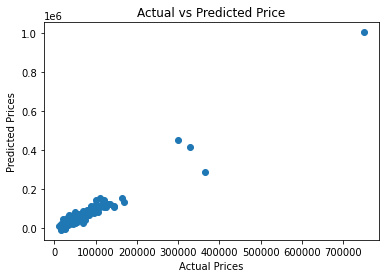

In [49]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)
plt.title('Actual vs Predicted Price')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()

# **Future Predictions**

## *Lets select a random sample from the existing dataset as a new value*

### Steps to Follow

1. Extract a random row using **sample function**
2. Separate X and Y
3. Predict

In [50]:
df_new = df.sample(1)

In [51]:
df_new

,Brand,Model,Selling_Price,Year,KM_Driven,Ex_Showroom_Price,Seller_Type_Individual,Owner_2nd owner,Owner_3rd owner,Owner_4th owner
401,Bajaj,Bajaj Pulsar AS150,55000,2017,20000,80821.0,1,1,0,0


In [52]:
df_new.shape

(1, 10)

In [59]:
X_new = df_new[['Year', 'Seller_Type_Individual', 'Owner_2nd owner',	'Owner_3rd owner',	'Owner_4th owner', 'KM_Driven', 'Ex_Showroom_Price']]

In [61]:
y_pred_new = lr.predict(X_new)

In [62]:
y_pred_new

array([54369.35850345])